Trying to better understand these health parameters...

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
from scipy import linalg
import math
from src.moduls import * 
from src.io_utils import *
from src.viz import *
import statsmodels.api as sm


np.random.seed(42)

df = clean_data(read_data("dataset/health_study_dataset.csv"))

df.sample(10)






,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
696,697,54,M,179.5,103.7,151.2,5.28,Yes,0
667,668,72,M,172.1,103.4,164.3,5.93,No,0
63,64,32,F,167.0,58.9,129.5,2.81,No,0
533,534,31,M,172.1,55.7,124.8,4.73,No,1
66,67,48,M,185.2,83.0,144.6,5.46,No,1
621,622,57,F,159.0,55.5,162.5,3.72,No,0
346,347,28,M,180.8,88.6,148.1,4.97,No,1
490,491,49,F,171.2,91.1,131.8,6.10,No,0
760,761,41,F,166.2,66.9,142.5,4.48,Yes,0
456,457,48,F,173.5,61.0,140.9,4.66,No,0


**Max, min, mean, median of:**
- Age
- Weight
- Height
- Systolic_bp
- Cholesterol


In [2]:
showing_standard_info(df)

,age,weight,height,systolic_bp,cholesterol
Max,90.00000,114.400,200.40000,185.900000,7.88000
Min,18.00000,33.700,144.40000,106.800000,2.50000
Mean,49.42625,73.413,171.84925,149.178625,4.92915
Median,50.00000,73.200,171.35000,149.400000,4.97000


**Boxplot of weight grouped by sexes**

**Conclusion: Men are heavier than women when comparing:**
- Mean
- Q1 to Q3, where men's interval is higher than women's
- The normalised interval, where the entire interval (excluding outliers) are higher than women
- Funny sidenote, even when looking at the outliers, the low-weight outliers-men are within the women's normal range, and vice versa for the heavier outliers of women, within the normal range of men.


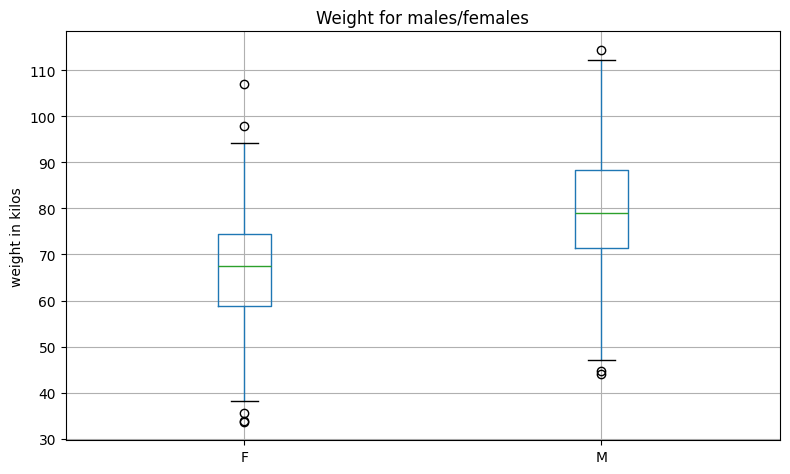

In [3]:
plot_gender_weight_difference(df)

**Comparing the blood pressure between disease and non-disease people, grouped by sex and smokers**

**Conclusion by only comparing the bars**
- Sick people have higher bloodpressure than non-sick people in all groups except males who smokes


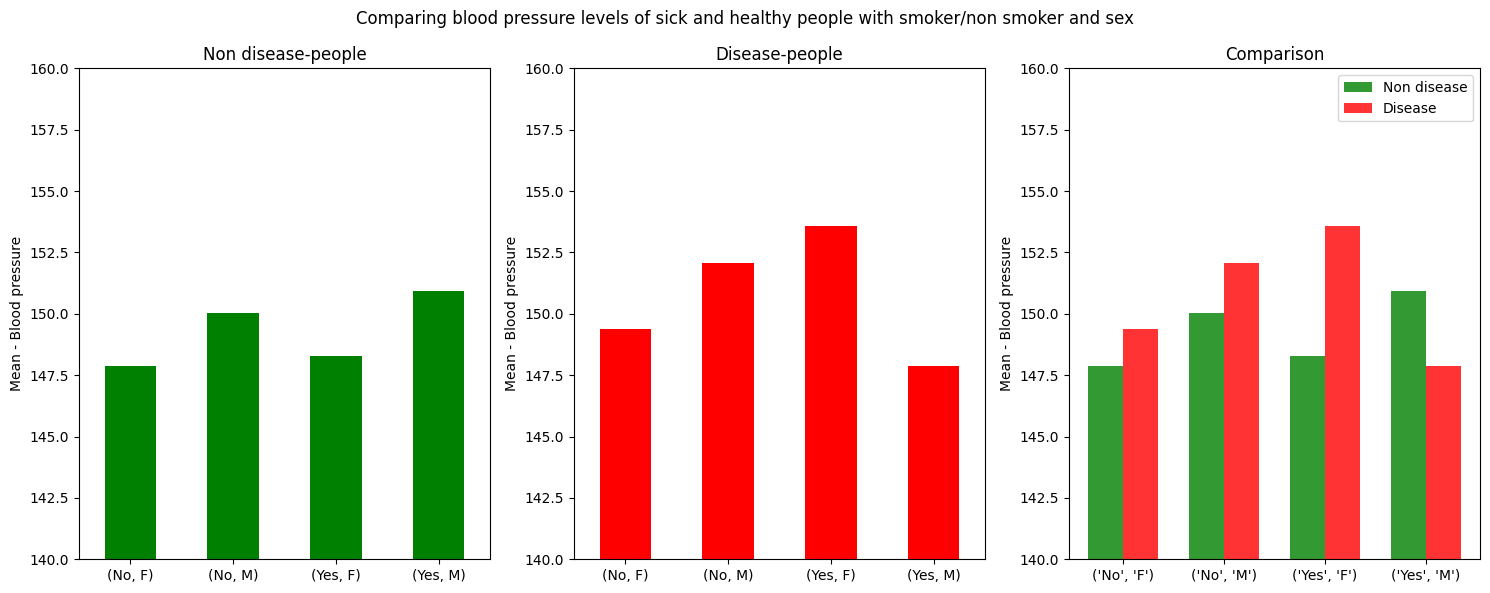

In [4]:
tuple_of_healthy_vs_diseased = healthy_vs_diseased_info(df)
plot_disease_vs_healthy(tuple_of_healthy_vs_diseased[1], tuple_of_healthy_vs_diseased[0])

**Comparing age with cholesterol between disease and non-disease people**

**Conclusion**
- Too few datapoints from the disease-group to actually tell anything but, but looking at age and cholesterol in it's total it seems like cholesterol raises with age.

c:\Users\Jakob\Desktop\Github-projekt\Examineringsuppgift\src\viz.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


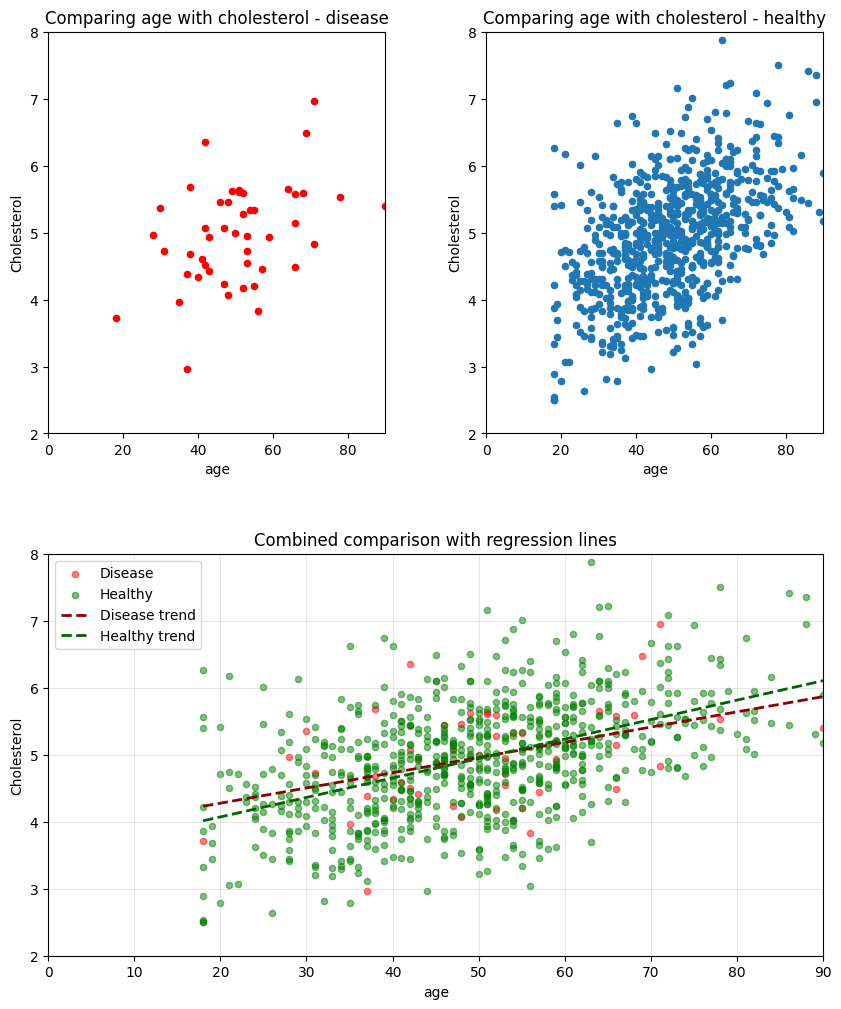

In [5]:
tuple_of_healthy_vs_diseased_mask = healthy_vs_diseased(df)
plot_comparing_age_with_cholesterol(tuple_of_healthy_vs_diseased_mask[0], tuple_of_healthy_vs_diseased_mask[1])

**Disease-frequency vs creating a random dataset with the actual disease frequency**

- Blue: Actual disease-frequency
- Yellow: Randomised dataset with the actual frequency in mind
- Red: Difference between the actual and the random frequency

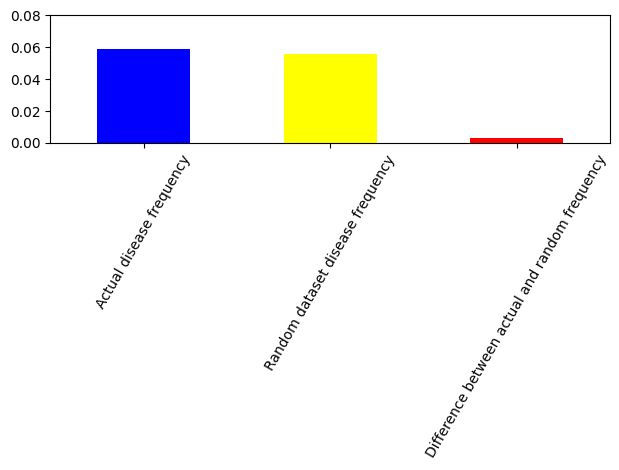

Actual disease frequency                          0.059
Random dataset disease frequency                  0.056
Difference between actual and random frequency    0.003
dtype: float64

In [6]:
df_frequency = actual_frequency_vs_random_generated_frequency(df)
plot_actual_frequency_vs_random_generated_frequency(df_frequency)
df_frequency

**CI normal approximation and bootstrap of systolic bp**

=== JÄMFÖRELSE AV KONFIDENSINTERVALL ===

                Method  Lower limit  Upper limit        Mean  Interval width
0  Normalapproximation   148.292090   150.065160  149.178625        1.773069
1            Bootstrap   148.296319   150.082416  149.178625        1.786097

=== SKILLNADER MELLAN METODERNA ===
Difference in lower limit: 0.0042
Difference in upperlimit: 0.0173
Difference in mean: 0.0000


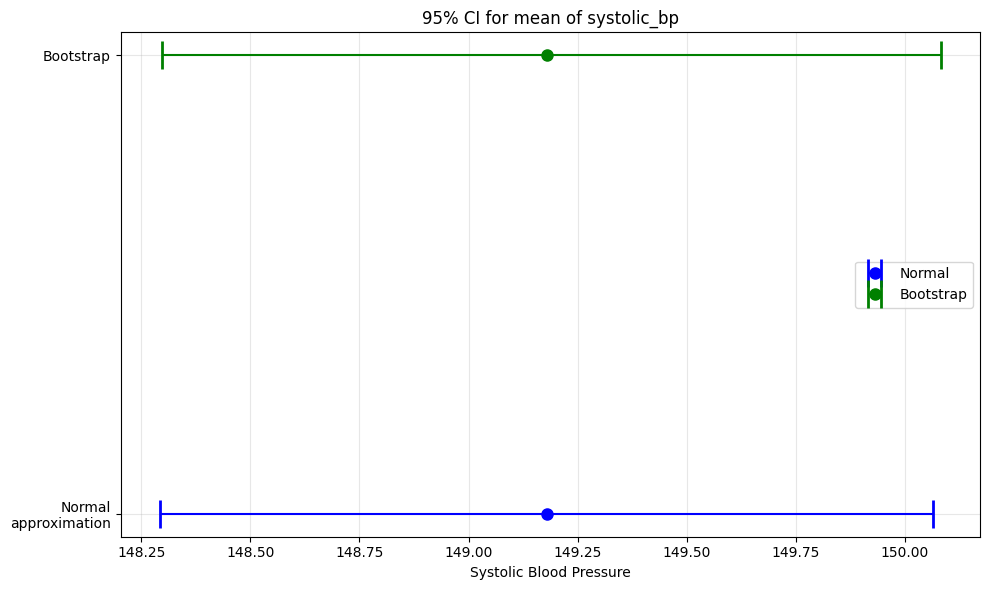

In [7]:
ci_analysis = CI_and_bootstrap(df["systolic_bp"], confidence=0.95)

results = ci_analysis.compare_methods(B=10000)

print("=== JÄMFÖRELSE AV KONFIDENSINTERVALL ===\n")
print(results['comparison_df'])
print("\n=== SKILLNADER MELLAN METODERNA ===")
print(f"Difference in lower limit: {results['differences']['lower_limit']:.4f}")
print(f"Difference in upperlimit: {results['differences']['upper_limit']:.4f}")
print(f"Difference in mean: {results['differences']['mean']:.4f}")

plot_ci_comparison(results)

**Trying hypothesis that:**
1. Bloodpressure in disease-group is different than from our entire sample

- *H0: Bloodpressure in disease-group is: the same as our entire sample* 
- *H1: Bloodpressure in disease-group is: different than in our sample*
__________________________________________________

2. Bloodpressure in healthy vs disease group is different

- *H0: Bloodpressure in healthy and disease-group is the same*
- *H1: Bloodpressure in healthy and disease-group is different*

**Conclusion**

Neither test showd a p-value < 0.05, but rather a p-value > 0.3 which is way too high for a significant result. Therefore, we cannot reject neither null hypothesis.

In [8]:
df["systolic_bp"].mean()

disease, healthy = healthy_vs_diseased(df)

t_test, p_value= stats.ttest_1samp(a=disease["systolic_bp"], 
                  popmean=df["systolic_bp"].mean())
print(t_test, p_value)

disease, healthy = healthy_vs_diseased(df)

stats.ttest_ind(a=disease["systolic_bp"],
                b=healthy["systolic_bp"],
                equal_var=False)

0.827253141004154 0.4123645746921004


TtestResult(statistic=np.float64(0.8541835931340537), pvalue=np.float64(0.39695573395339223), df=np.float64(51.54602842475532))

**Checking for how often our t-test will actually find a difference if there is one (type 2 error)**

- Power: 0.169 with difference between sick and healthy set to: 2mmHg
- Power: 0.718 with difference between sick and healthy set to: 5mmHg
- Power: 1.000 with difference between sick and healthy set to: 10mmHg

Conclusion: Our t-test will not find small differences between the groups, since our datapoints are too few. However, greater differences between the groups will still be found. If we want our t-test to be more refined for finding even small differences, we need to increase our n greatly.


In [9]:
n_sick = 47           
n_healthy = 753       
std_sick = 13.17      
std_healthy = 12.77   


mean_healthy = 120    
diff_to_find = 2      
mean_sick = mean_healthy + diff_to_find

alpha = 0.05          
n_simulations = 1000  

significant_results = 0

for _ in range(n_simulations):

    sick_data = np.random.normal(loc=mean_sick, scale=std_sick, size=n_sick)
    healthy_data = np.random.normal(loc=mean_healthy, scale=std_healthy, size=n_healthy)

    t_stat, p_value = stats.ttest_ind(
        a=sick_data, 
        b=healthy_data, 
        equal_var=False
    )


    if p_value < alpha:
        significant_results += 1

power = significant_results / n_simulations

print(f"--- Simulation Results ---")
print(f"Assumed true difference (Effect size): {diff_to_find} mmHg")
print(f"Sample sizes: Sick={n_sick}, Healthy={n_healthy}")
print(f"Significance level (Alpha): {alpha}")
print(f"\nNumber of significant results: {significant_results} of {n_simulations}")
print(f"Calculated power (Power): {power:.3f}")

diff_to_find = 5
mean_sick = mean_healthy + diff_to_find 

significant_results = 0

for _ in range(n_simulations):
    sick_data = np.random.normal(loc=mean_sick, scale=std_sick, size=n_sick)
    healthy_data = np.random.normal(loc=mean_healthy, scale=std_healthy, size=n_healthy)

    t_stat, p_value = stats.ttest_ind(
        a=sick_data, 
        b=healthy_data, 
        equal_var=False
    )

    if p_value < alpha:
        significant_results += 1

power = significant_results / n_simulations

print(f"--- Simulation Results (Difference 5 mmHg) ---")
print(f"Assumed true difference (Effect size): {diff_to_find} mmHg")
print(f"Calculated power (Power): {power:.3f}")



mean_healthy = 120    
diff_to_find = 10
mean_sick = mean_healthy + diff_to_find 

alpha = 0.05          
n_simulations = 1000  

significant_results = 0

for _ in range(n_simulations):
    sick_data = np.random.normal(loc=mean_sick, scale=std_sick, size=n_sick)
    healthy_data = np.random.normal(loc=mean_healthy, scale=std_healthy, size=n_healthy)

    t_stat, p_value = stats.ttest_ind(
        a=sick_data, 
        b=healthy_data, 
        equal_var=False
    )

    if p_value < alpha:
        significant_results += 1

power = significant_results / n_simulations

print(f"--- Simulation Results (Difference 10 mmHg) ---")
print(f"Assumed true difference (Effect size): {diff_to_find} mmHg")
print(f"Calculated power (Power): {power:.3f}")


--- Simulation Results ---
Assumed true difference (Effect size): 2 mmHg
Sample sizes: Sick=47, Healthy=753
Significance level (Alpha): 0.05

Number of significant results: 169 of 1000
Calculated power (Power): 0.169
--- Simulation Results (Difference 5 mmHg) ---
Assumed true difference (Effect size): 5 mmHg
Calculated power (Power): 0.718
--- Simulation Results (Difference 10 mmHg) ---
Assumed true difference (Effect size): 10 mmHg
Calculated power (Power): 1.000


**Trying hypothesis that the bloodpressure between smokers and non smokers are different**

- H0: Bloodpressure between the groups smokers vs non smokers is not different
- H1: Bloodpressure between the groups smokers vs non smokers is different

Result: p-value = 0.65 which means that we cannot reject our null hypothesis

In [10]:
smokers, non_smokers = looking_for_them_smokers(df)

stats.ttest_ind(a=smokers["systolic_bp"],
                b=non_smokers["systolic_bp"],
                equal_var=False)

TtestResult(statistic=np.float64(0.4503433193393224), pvalue=np.float64(0.6527338743398998), df=np.float64(360.15254973870043))

The result we just got shows a p-value of 0.65, which is too high to reject our null hypothesis (that the mean of bloodpressures from smokers vs non smokers are the basically the same). 

So is anything correlating with blood pressure? Let's take a look at Paul Allens... , i mean do a multiple regression with the independent variables age, weight, height and cholesterol and check if any of these correlate with systolic_bp.

In [11]:
Y = df["systolic_bp"].values

X = df[["age", "height", "weight", "cholesterol"]].values

X_with_intercept = np.column_stack([np.ones(len(X)), X])

coefficients, residuals, rank, s = linalg.lstsq(X_with_intercept, Y)

print("Intercept ({beta_0}):", coefficients[0])
print("age coefficient ({beta_1}):", coefficients[1])
print("height coefficient ({beta_2}):", coefficients[2])
print("weight coefficient ({beta_3}):", coefficients[3])
print("cholesterol ({beta_4}):", coefficients[4])

y_pred = X_with_intercept @ coefficients

ss_res = np.sum((Y - y_pred) ** 2)
ss_tot = np.sum((Y - np.mean(Y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"\nR-squared: {r_squared:.4f}")

df["predicted_systolic_bp"] = y_pred
df["residuals"] = Y - y_pred

X_with_intercept = sm.add_constant(X)
model = sm.OLS(Y, X_with_intercept).fit()
print(model.summary())


Intercept ({beta_0}): 100.9083999835109
age coefficient ({beta_1}): 0.523468382767608
height coefficient ({beta_2}): 0.04757036504258483
weight coefficient ({beta_3}): 0.15800907499523834
cholesterol ({beta_4}): 0.5319972176342372

R-squared: 0.4070
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     136.4
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           1.01e-88
Time:                        14:23:08   Log-Likelihood:                -2964.8
No. Observations:                 800   AIC:                             5940.
Df Residuals:                     795   BIC:                             5963.
Df Model:                           4                                         
Covariance Type:            nonrobust  

**Ok so what the hell do these numbers mean?** 
The regression coefficients tell us how much systolic BP changes for each unit increase in the independent variable, holding other variables constant.

From the results, age and cholesterol have the largest coefficients (0.52 and 0.53), suggesting they might be the strongest predictors. However, these 4 variables in TOTAL explain about 40% of the variance in systolic BP, which means we have 60% unexplained variance. 

But when we look at the p-value, we see that x1 (age), and x3 (weight) are statistically significant. This means that, even though cholesterol had a large coefficient, it's not statistically significant, and therefore we have to drop it. So we are left with only age as a statistically significant variable with a high coefficient. Let's do the same multiple regression but using only age and weight, and see if R-squared drops or not. If it drops, there is something else going on. If it stays pretty much the same, then we can drop the other variables.

In [12]:
X_reduced = df[["age", "weight"]].values
X_reduced = sm.add_constant(X_reduced)

model_reduced = sm.OLS(Y, X_reduced).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     271.5
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           1.18e-90
Time:                        14:23:08   Log-Likelihood:                -2965.9
No. Observations:                 800   AIC:                             5938.
Df Residuals:                     797   BIC:                             5952.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.4991      2.266     48.324      0.0

**Conclusion**

- R-squared stayed the same, so we only focus on age and weight
- Next step: To see if age and weight have multicollinarity

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_reduced = df[["age", "weight"]].values

vif_data = pd.DataFrame()
vif_data["Variable"] = ["age", "weight"]
vif_data["VIF"] = [variance_inflation_factor(X_reduced, i) for i in range(X_reduced.shape[1])]
print(vif_data)

  Variable       VIF
0      age  8.949952
1   weight  8.949952


We have a VIF above 5, which is considered problematic. So age and weight are heavily influenced by the other.

In [14]:
df.info()

disease.describe()
healthy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     800 non-null    int64  
 1   age                    800 non-null    int64  
 2   sex                    800 non-null    object 
 3   height                 800 non-null    float64
 4   weight                 800 non-null    float64
 5   systolic_bp            800 non-null    float64
 6   cholesterol            800 non-null    float64
 7   smoker                 800 non-null    object 
 8   disease                800 non-null    int64  
 9   predicted_systolic_bp  800 non-null    float64
 10  residuals              800 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 68.9+ KB


,id,age,height,weight,systolic_bp,cholesterol,disease
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.0
mean,400.551129,49.347942,171.767995,73.285126,149.079416,4.926242,0.0
std,230.263056,14.547101,9.805052,13.787134,12.771772,0.854571,0.0
min,1.000000,18.000000,144.400000,33.700000,106.800000,2.500000,0.0
25%,203.000000,39.000000,164.700000,64.600000,140.800000,4.310000,0.0
50%,402.000000,50.000000,171.300000,72.900000,149.300000,4.970000,0.0
75%,599.000000,59.000000,178.900000,82.600000,157.600000,5.480000,0.0
max,800.000000,90.000000,200.400000,114.400000,185.900000,7.880000,0.0
